# Data cleansing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [3]:
# load data
path = '/content/drive/MyDrive/data_anal_project/Hotel_price/data_file/hotel_data_full.csv'
df = pd.read_csv(path)
df.head()

,name_hotel,location_hotel,Free_Wifi_hotel,rating_hotel_num,rating_hotel_text,rating_hotel_qty,normal_price_hotel,discount_hotel,discount_price_hotel,reward_point_hotel,room,date
0,Maple Hotel Grogol,Jakarta Barat,Free Wifi,8.4,Luar Biasa,124.0,708.000,31,292.800,234,1,08-12-2021
1,Juno Jatinegara,Jakarta Timur,Free Wifi,8.8,Luar Biasa,55.0,500.000,26,259.622,207,1,08-12-2021
2,Oakwood PIK,Jakarta Utara,Free Wifi,8.7,Luar Biasa,6.0,2.000.000,16,1.344.000,1075,1,08-12-2021
3,N2 Hotel Gunung Sahari,Jakarta Pusat,Free Wifi,8.0,Sangat Baik,38.0,374.692,35,146.130,116,1,08-12-2021
4,Kimaya Slipi,Jakarta Barat,Free Wifi,NaN,NaN,NaN,474.998,5,383.562,306,1,08-12-2021


In [ ]:
# info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name_hotel            976 non-null    object 
 1   location_hotel        985 non-null    object 
 2   Free_Wifi_hotel       985 non-null    object 
 3   rating_hotel_num      786 non-null    object 
 4   rating_hotel_text     740 non-null    object 
 5   rating_hotel_qty      786 non-null    float64
 6   normal_price_hotel    985 non-null    object 
 7   discount_hotel        985 non-null    int64  
 8   discount_price_hotel  985 non-null    object 
 9   reward_point_hotel    985 non-null    int64  
 10  room                  985 non-null    int64  
 11  date                  985 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 92.5+ KB


In [ ]:
# columns
df.columns

Index(['name_hotel', 'location_hotel', 'Free_Wifi_hotel', 'rating_hotel_num',
       'rating_hotel_text', 'rating_hotel_qty', 'normal_price_hotel',
       'discount_hotel', 'discount_price_hotel', 'reward_point_hotel', 'room',
       'date'],
      dtype='object')

In [ ]:
# look at the data missing value (percent)

miss_val = df.isnull().sum() / len(df)
miss_val.sort_values()

location_hotel          0.000000
Free_Wifi_hotel         0.000000
normal_price_hotel      0.000000
discount_hotel          0.000000
discount_price_hotel    0.000000
reward_point_hotel      0.000000
room                    0.000000
date                    0.000000
name_hotel              0.009137
rating_hotel_num        0.202030
rating_hotel_qty        0.202030
rating_hotel_text       0.248731
dtype: float64

In [8]:
# function - unique
def unique(col):
  return df[col].unique()

# Look into each column

## name_hotel

In [ ]:
# unique val
# unique('name_hotel')

In [4]:
# clean the ', \n \n \n ' and strip the left whitespace

df['name_hotel'] = df['name_hotel'].replace(", \n \n \n ", "")
df['name_hotel'] = df['name_hotel'].str.strip()

In [5]:
df[df['name_hotel'].isnull() == True]

,name_hotel,location_hotel,Free_Wifi_hotel,rating_hotel_num,rating_hotel_text,rating_hotel_qty,normal_price_hotel,discount_hotel,discount_price_hotel,reward_point_hotel,room,date
167,NaN,Tabanan,Free Wifi,9.4,Istimewa,3.0,1.029.552,5,978.075,782,1,08-12-2021
186,NaN,Badung,Free Wifi,8.3,Luar Biasa,81.0,658.000,13,201.500,161,1,08-12-2021
257,NaN,Badung,Free Wifi,8.5,Luar Biasa,22.0,1.366.315,5,359.546,287,1,08-12-2021
287,NaN,Denpasar,Free Wifi,9.5,Istimewa,3.0,431.307,35,280.350,224,1,08-12-2021
591,NaN,Lubuk Baja,Free Wifi,8.5,Luar Biasa,20.0,538.461,35,350.000,280,1,08-12-2021
608,NaN,Batu Ampar,Free Wifi,NaN,NaN,NaN,321.538,35,209.000,167,1,08-12-2021
650,NaN,Nongsa,Free Wifi,5.6,NaN,5.6,5.263.158,5,3.150.000,2520,1,08-12-2021
656,NaN,Batu Ampar,Free Wifi,7.8,Sangat Baik,26.0,289.230,35,188.000,150,1,08-12-2021
762,NaN,Tegalrejo,Free Wifi,NaN,NaN,NaN,750.867,5,606.325,485,1,08-12-2021


In [6]:
# impute missing value with unknown
df['name_hotel']  = df['name_hotel'] .fillna("Unknown")
df[df['name_hotel'].isnull() == True]

,name_hotel,location_hotel,Free_Wifi_hotel,rating_hotel_num,rating_hotel_text,rating_hotel_qty,normal_price_hotel,discount_hotel,discount_price_hotel,reward_point_hotel,room,date


##location_hotel

In [9]:
# unique val
unique('location_hotel')

array(['Jakarta Barat', 'Jakarta Timur', 'Jakarta Utara', 'Jakarta Pusat',
       'Jakarta Selatan', 'Badung', 'Denpasar', 'Gianyar', 'Tabanan',
       'Buleleng', 'Klungkung', 'Bangli', 'Kuta', 'Denpasar Barat',
       'Renon', 'Padang Utara', 'Padang Barat', 'Padang Timur', 'Sawahan',
       'Ulak Karang Selatan', 'Nanggalo', 'Koto Tangah', 'Padang Selatan',
       'Bungus Teluk Kabung', 'Bandung Wetan', 'Cidadap', 'Astana Anyar',
       'Sumurbandung', 'Cicendo', 'Coblong', 'Arcamanik', 'Buahbatu',
       'Lengkong', 'Cibeunying Kaler', 'Setiabudi', 'Sukasari', 'Cinambo',
       'Andir', 'Sukajadi', 'Regol', 'Babakan Ciparay',
       'Soekarno Hatta Bypass', 'Ciumbuleuit', 'Batununggal', 'Cimenyan',
       'Kiaracondong', 'Cimahi', 'Pangalengan', 'Rancasari', 'Cihampelas',
       'Rancabali', 'Bojongloa Kidul', 'Pasirjambu', 'Cibiru',
       'Parongpong', 'Bandung Kidul', 'Bojongloa Kaler', 'Ciwidey',
       'Antapani', 'Sei Beduk', 'Batu Ampar', 'Lubuk Baja', 'Bengkong',
       'Ba

## Free_Wifi_hotel

In [10]:
# unique val
unique('Free_Wifi_hotel')

array(['Free Wifi', 'No'], dtype=object)

##rating_hotel_num

In [11]:
# check missing value
df[df['rating_hotel_num'].isnull() == True].sample(10)

,name_hotel,location_hotel,Free_Wifi_hotel,rating_hotel_num,rating_hotel_text,rating_hotel_qty,normal_price_hotel,discount_hotel,discount_price_hotel,reward_point_hotel,room,date
606,RedDoorz Plus near Nagoya Hill,Lubuk Baja,Free Wifi,NaN,NaN,NaN,202.501,5,105.807,84,1,08-12-2021
643,"Hotel Pelita TerangLubuk Baja,",Lubuk Baja,Free Wifi,NaN,NaN,NaN,215.582,5,126.978,101,1,08-12-2021
347,"OYO 3073 Twin House SyariahNanggalo,",Nanggalo,Free Wifi,NaN,NaN,NaN,159.556,5,118.232,94,1,08-12-2021
824,"Puri Sidikan Inn RedPartnerUmbulharjo,",Umbulharjo,Free Wifi,NaN,NaN,NaN,337.414,5,176.299,141,1,08-12-2021
283,The Decks,Badung,Free Wifi,NaN,NaN,NaN,1.435.789,5,736.560,589,1,08-12-2021
4,Kimaya Slipi,Jakarta Barat,Free Wifi,NaN,NaN,NaN,474.998,5,383.562,306,1,08-12-2021
417,Panen Hotel,Bandung Wetan,Free Wifi,NaN,NaN,NaN,282.105,5,268.000,214,1,08-12-2021
241,Villa,Badung,Free Wifi,NaN,NaN,NaN,2.042.105,5,1.261.000,1008,1,08-12-2021
271,"OYO 2136 Escotel KrisnantaraBadung,",Badung,Free Wifi,NaN,NaN,NaN,200.238,5,148.377,118,1,08-12-2021
372,Lestari Guesthouse,Padang Barat,Free Wifi,NaN,NaN,NaN,356.036,5,202.941,162,1,08-12-2021


In [12]:
# There is error below code 
# ValueError: Unable to parse string "10I" at position 102

# check that value
df[df['rating_hotel_num'] == '10I'].head(3)

,name_hotel,location_hotel,Free_Wifi_hotel,rating_hotel_num,rating_hotel_text,rating_hotel_qty,normal_price_hotel,discount_hotel,discount_price_hotel,reward_point_hotel,room,date
102,Fieris Hotel,Jakarta Timur,Free Wifi,10I,stimewa,1.0,552.631,5,525.000,420,1,08-12-2021
150,"Benoa Sea Suites and VillasBadung,",Badung,Free Wifi,10I,stimewa,1.0,1.307.368,5,409.860,327,1,08-12-2021
176,"Rimbun Canggu HotelBadung,",Badung,Free Wifi,10I,stimewa,2.0,1.164.307,35,317.856,254,1,08-12-2021


In [13]:
# change '10I' to 10
df['rating_hotel_num'] = df['rating_hotel_num'].replace('10I', '10')
df[df['rating_hotel_num'] == '10I'].head(3)

,name_hotel,location_hotel,Free_Wifi_hotel,rating_hotel_num,rating_hotel_text,rating_hotel_qty,normal_price_hotel,discount_hotel,discount_price_hotel,reward_point_hotel,room,date


In [14]:
df['rating_hotel_num'].dtype

dtype('O')

In [15]:
# change data type from object to float
df['rating_hotel_num'] = pd.to_numeric(df['rating_hotel_num'])

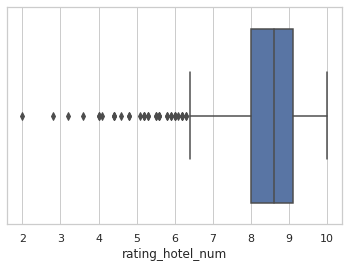

In [16]:
# check outlier
ax = sns.boxplot(x=df["rating_hotel_num"])

In [17]:
# imput rating with mean
df['rating_hotel_num'] = df['rating_hotel_num'].fillna(df['rating_hotel_num'].mean())

In [18]:
df['rating_hotel_num'].mean()

8.402544529262078

In [19]:
# check missing value again
df[df['rating_hotel_num'].isnull() == True]

,name_hotel,location_hotel,Free_Wifi_hotel,rating_hotel_num,rating_hotel_text,rating_hotel_qty,normal_price_hotel,discount_hotel,discount_price_hotel,reward_point_hotel,room,date


In [20]:
df['rating_hotel_num'] = df['rating_hotel_num'].round(1)
df['rating_hotel_num'].head()

0    8.4
1    8.8
2    8.7
3    8.0
4    8.4
Name: rating_hotel_num, dtype: float64

##rating_hotel_text

In [21]:
# unique val
unique('rating_hotel_text')

array(['Luar Biasa', 'Sangat Baik', nan, 'Istimewa', 'Baik', 'stimewa'],
      dtype=object)

In [22]:
# replace 'stimewa' to 'Istimewa'
df['rating_hotel_text'] = df['rating_hotel_text'].replace('stimewa', 'Istimewa')

In [23]:
# impute missing value with 'Luar Biasa'
# since the impute of missing value is 8.402544529262078, it down to 'Luar Biasa'
df['rating_hotel_text']  = df['rating_hotel_text'].fillna('Luar Biasa')
df[df['rating_hotel_text'].isnull() == True]

,name_hotel,location_hotel,Free_Wifi_hotel,rating_hotel_num,rating_hotel_text,rating_hotel_qty,normal_price_hotel,discount_hotel,discount_price_hotel,reward_point_hotel,room,date


##rating_hotel_qty

In [24]:
# imput rating with 0
df['rating_hotel_qty'] = df['rating_hotel_qty'].replace(np.nan, 0, regex = True)

In [25]:
df[df['rating_hotel_qty'].isnull() == True]

,name_hotel,location_hotel,Free_Wifi_hotel,rating_hotel_num,rating_hotel_text,rating_hotel_qty,normal_price_hotel,discount_hotel,discount_price_hotel,reward_point_hotel,room,date


In [26]:
df['rating_hotel_qty'] = df['rating_hotel_qty'].astype(int)
df['rating_hotel_qty'].head()

0    124
1     55
2      6
3     38
4      0
Name: rating_hotel_qty, dtype: int64

##normal_price_hotel

In [27]:
# remove '.' in each value
df['normal_price_hotel'] = (df['normal_price_hotel'].replace('\.','', regex=True).replace(',','.', regex=True).astype(float))
df['normal_price_hotel'].head()

0     708000.0
1     500000.0
2    2000000.0
3     374692.0
4     474998.0
Name: normal_price_hotel, dtype: float64

In [28]:
# unique val
# unique('normal_price_hotel')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


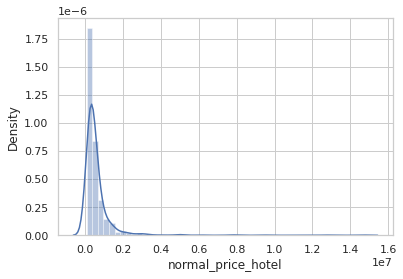

In [29]:
#histogram
sns.distplot(df['normal_price_hotel'])

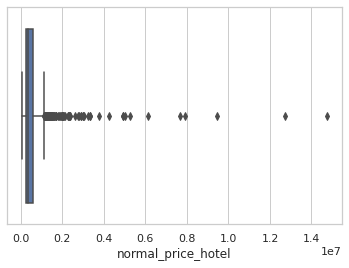

In [30]:
# check outlier
ax = sns.boxplot(x=df["normal_price_hotel"])

##discount_hotel

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


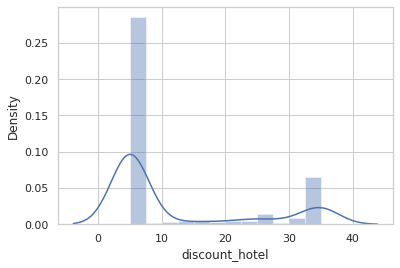

In [31]:
#histogram
sns.distplot(df['discount_hotel'])

##discount_price_hotel

In [32]:
# remove '.' in each value
df['discount_price_hotel'] = (df['discount_price_hotel'].replace('\.','', regex=True).replace(',','.', regex=True).astype(float))
df['discount_price_hotel'].head()

0     292800.0
1     259622.0
2    1344000.0
3     146130.0
4     383562.0
Name: discount_price_hotel, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


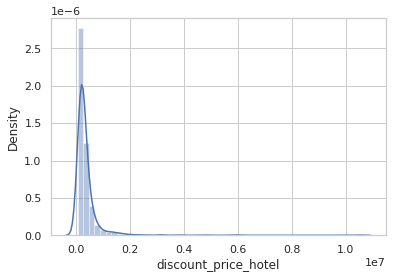

In [33]:
#histogram
sns.distplot(df['discount_price_hotel'])

##reward_point_hotel

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


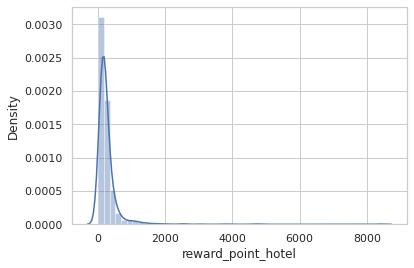

In [34]:
#histogram
sns.distplot(df['reward_point_hotel'])

##room


In [35]:
# unique val
unique('room')

array([1])

##date

In [36]:
# unique val
unique('date')

array(['08-12-2021'], dtype=object)

In [37]:
df['date'] = pd.to_datetime(df['date'])

In [38]:
df.head()

,name_hotel,location_hotel,Free_Wifi_hotel,rating_hotel_num,rating_hotel_text,rating_hotel_qty,normal_price_hotel,discount_hotel,discount_price_hotel,reward_point_hotel,room,date
0,Maple Hotel Grogol,Jakarta Barat,Free Wifi,8.4,Luar Biasa,124,708000.0,31,292800.0,234,1,2021-08-12
1,Juno Jatinegara,Jakarta Timur,Free Wifi,8.8,Luar Biasa,55,500000.0,26,259622.0,207,1,2021-08-12
2,Oakwood PIK,Jakarta Utara,Free Wifi,8.7,Luar Biasa,6,2000000.0,16,1344000.0,1075,1,2021-08-12
3,N2 Hotel Gunung Sahari,Jakarta Pusat,Free Wifi,8.0,Sangat Baik,38,374692.0,35,146130.0,116,1,2021-08-12
4,Kimaya Slipi,Jakarta Barat,Free Wifi,8.4,Luar Biasa,0,474998.0,5,383562.0,306,1,2021-08-12


## Add location (city)

In [39]:
df['city'] = ['Jakarta']*150 + ['Bali']*150 + ['Padang']*85 + ['Bandung']*150 + ['Batam']*150 + ['Jogja']*150 + ['Malang']*150

df.head()

,name_hotel,location_hotel,Free_Wifi_hotel,rating_hotel_num,rating_hotel_text,rating_hotel_qty,normal_price_hotel,discount_hotel,discount_price_hotel,reward_point_hotel,room,date,city
0,Maple Hotel Grogol,Jakarta Barat,Free Wifi,8.4,Luar Biasa,124,708000.0,31,292800.0,234,1,2021-08-12,Jakarta
1,Juno Jatinegara,Jakarta Timur,Free Wifi,8.8,Luar Biasa,55,500000.0,26,259622.0,207,1,2021-08-12,Jakarta
2,Oakwood PIK,Jakarta Utara,Free Wifi,8.7,Luar Biasa,6,2000000.0,16,1344000.0,1075,1,2021-08-12,Jakarta
3,N2 Hotel Gunung Sahari,Jakarta Pusat,Free Wifi,8.0,Sangat Baik,38,374692.0,35,146130.0,116,1,2021-08-12,Jakarta
4,Kimaya Slipi,Jakarta Barat,Free Wifi,8.4,Luar Biasa,0,474998.0,5,383562.0,306,1,2021-08-12,Jakarta


In [43]:
unique('city')

array(['Jakarta', 'Bali', 'Padang', 'Bandung', 'Batam', 'Jogja', 'Malang'],
      dtype=object)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   name_hotel            985 non-null    object        
 1   location_hotel        985 non-null    object        
 2   Free_Wifi_hotel       985 non-null    object        
 3   rating_hotel_num      985 non-null    float64       
 4   rating_hotel_text     985 non-null    object        
 5   rating_hotel_qty      985 non-null    int64         
 6   normal_price_hotel    985 non-null    float64       
 7   discount_hotel        985 non-null    int64         
 8   discount_price_hotel  985 non-null    float64       
 9   reward_point_hotel    985 non-null    int64         
 10  room                  985 non-null    int64         
 11  date                  985 non-null    datetime64[ns]
 12  city                  985 non-null    object        
dtypes: datetime64[ns](1)

# To csv

In [ ]:
# # to csv
# path = '/content/drive/MyDrive/data_anal_project/Hotel_price/data_file/'
# df.to_csv(path+'hotel_data_full_clean.csv', index=False, encoding='utf-8')

In [44]:
# to csv
path = '/content/drive/MyDrive/data_anal_project/Hotel_price/data_file/'
df.to_csv(path+'hotel_data_full_clean_2.csv', index=False, encoding='utf-8')

## Refrences

- https://jamesrledoux.com/code/imputation
- https://stackoverflow.com/questions/32464280/converting-currency-with-to-numbers-in-python-pandas